# P-N Junction
This is the first device we discuss in details. Physical insights into operations of PN junctions are essential for understanding transistors (e.g. BJT and MOSFET.)
- __P-N Junction in Equilibrium__
- __Ideal Current Model__
    - __Forward Bias__
    - __Reverse Bias__
    - __Discussion__

The code bolck below contains some fundamental physical constants as well as the material parameters we learned from previous lectures. Run the code block and make sure you understand every line before you proceed.

In [1]:
import numpy as np
# mathematical constant
pi   = 3.1415926535

# physical constants
ep_0 = 8.854187817e-14 # Vaccuem Permittivity, F/cm
q    = 1.6021766208E-19    # Elementary electric charge, C
k    = 8.6173303E-5        # Boltzmann constant, eV/K

# Material Parameters
Nc   = 2.82e19 # Effective Density of States of the CB, 1/cm^3
Nv   = 1.83e19 # Effective Density of States of the VB, 1/cm^3
epSi = 11.9 * ep_0 # Permittivity
Eg   = 1.12 # Bandgap, eV
T    = 300 # Absolute temperature, K
ni   = (Nc * Nv * np.exp(-Eg/k/T) )**0.5  ## Instrisic Carrer Density, 1/cm^3

mu_n = 1400 # Electron mobility, cm^2/s-V
mu_p = 470  # Hole mobility, cm^2/s-V
D_n = mu_n * k * T # Electron Diffusion Coefficient according to Einstien's relation, cm^2/V
D_p = mu_p * k * T # Hole Diffusion Coefficient according to Einstien's relation, cm^2/V

tau_n = 1e-10 # R-G lifetime for minority electrons, s
tau_p = 1e-10 # R-G lifetime for minority holes, s

## P-N Junction in Equilibrium

Let's start to look at the simplest device where we form a "junction" by putting a uniformly-doped n-type and a uniformly-doped p-type semiconductor together. If the interface is a flat plane between the two bulk regions, we can think of it as an 1-D device.
We can calculate $E_c - E_f$ for both the n-type and p-type charge-neutral regions using the boltzmann approxiamtion.

\begin{align}
n-type:\ E_{c,n} - E_f &= kT \ln \frac{N_c}{n} 
                  = kT \ln (N_c\times \frac{1}{N_D}) \\
p-type:\ E_{c,p} - E_f &= kT \ln \frac{N_c}{n} 
                  = kT \ln (N_c\times \frac{N_A}{n_i^2})
\end{align}

Recall that the Fermi level is constant in equilibrium, so the difference of the conduction band energy results in a "__Built-in potential__".

\begin{equation}
q V_{bi} = E_{c,p} - E_{c,n} = kT \ln (N_c\times \frac{N_A}{n_i^2}) - kT \ln (N_c\times \frac{1}{N_D}) = kT \ln \frac{N_A N_D}{n_i^2}
\end{equation}

The potential difference means there is electric field somewhere between the two regions. According to the 1-D Poisson equation, 

\begin{equation}
\frac{d^2 V}{dx^2} = - \frac{\rho}{\epsilon_{Si}}
\end{equation}

and the boundary conditions $\mathcal E=0$ for $x=-\infty$ and $x=\infty$, there must be non-zero charge near the interface. Where does this charge come from?

<img src="img/pn_Vbi.png" width="400">

Now think of what happens when the junction is formed. Electrons __diffuse__ from n-type to p-type and recombine with holes. Similarly, holes __diffuse__ from p-type to n-type and recombine with electrons. 
Therefore, there will be little electrons and holes near the interface, and we say that the region is __depleted__. 
The ionize dopant charge is neutralized by carrier charges in the charge neutral region as before, but it dominates the charge density in the depletion region. Therefore, 
 
- the net charge density in n-type depletion region is approximately $N_D^+$ because $n, p << N_D^+$.
- the net charge density in p-type depletion region is approximately $N_A^-$ because $n, p << N_A^-$.

The __depletion charge__ then produce electric field which results in drift in the opposite direction of diffusion. Finally, no net current can flow when equilibirum is reached.

To make the solving more tractable, we further assume that the transition is abrupt from depletion region to charge neutral region. i.e.

\begin{align}
 \rho &= N_D \ & for \ -x_n < x < 0 \\
 \rho &= -N_A \ & for \ 0 < x < x_p \\
 \rho &= 0 \ & otherwise 
\end{align}

where the interface locates at x=0, depletion width in n-type ($x<0$) is $x_n$, and depletion width in p-type ($x>0$) is $x_p$.
This is called __depletion approximation__ which works well for the scope of this entire class. The code bolck below plots the solution to the poisson equation with depletion approximation.

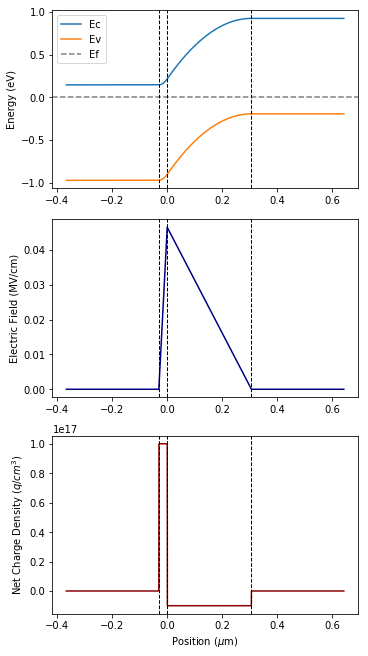

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(5,9),constrained_layout=True)
gs  = gridspec.GridSpec(3,1,figure=fig)
AX = [fig.add_subplot(gs[i]) for i in range(3)]

sample = 10000
Ef = 0
NA = 1e16
ND = 1e17

Vbi = k*T * np.log(NA*ND/ni**2)
WD = (2*epSi*Vbi/q*(1/NA+1/ND))**0.5
xn = WD * NA/(NA+ND)
xp = WD * ND/(NA+ND)

x = np.linspace(-xn-WD,xp+WD,sample)
Ec = np.zeros(sample)
Efield  = np.zeros(sample)
SpaceCharge = np.zeros(sample)

idx_ndep = np.all([-xn<=x,x<=0],axis=0)
idx_pdep = np.all([ 0<x,x<=xp],axis=0)
Ec[x<-xn ] = k*T * np.log(Nc/ND)
Ec[x> xp ] = k*T * np.log(Nc*NA/ni**2)
Ec[idx_ndep] =  q*ND / (2 * epSi) * (x[idx_ndep]+xn)**2 + k*T * np.log(Nc/ND)
Ec[idx_pdep] = -q*NA / (2 * epSi) * (x[idx_pdep]-xp)**2 + k*T * np.log(Nc*NA/ni**2)
Efield[idx_ndep] =  q*ND / epSi * (x[idx_ndep]+xn)
Efield[idx_pdep] = -q*NA / epSi * (x[idx_pdep]-xp)
SpaceCharge[idx_ndep] =  ND
SpaceCharge[idx_pdep] = -NA

AX[0].plot(1e4*x,Ec,label="Ec")
AX[0].plot(1e4*x,Ec-Eg,label="Ev")
AX[0].axhline(y=0,ls="--",c="grey",label="Ef")
AX[0].legend()
AX[0].set_ylabel("Energy (eV)")
AX[1].plot(1e4*x,Efield/1E6,c="navy")
AX[1].set_ylabel("Electric Field (MV/cm)")
AX[2].plot(1e4*x,SpaceCharge,c="darkred")
AX[2].set_xlabel("Position ($\mu$m)")
AX[2].set_ylabel("Net Charge Density ($q/cm^3$)")

for ax in AX:
    ax.axvline(x= -1e4*xn,ls="--",c='k',lw=1)
    ax.axvline(x=  0     ,ls="--",c='k',lw=1)
    ax.axvline(x=  1e4*xp,ls="--",c='k',lw=1)

plt.show()

By solving the above formulation and matching the boundary conditions, we have

\begin{align}
x_n &= \sqrt{ \frac{2\epsilon_{Si} V_{bi}}{q} \frac{N_A}{N_D} \frac{1}{N_A + N_D} }  \\
x_p &= \sqrt{ \frac{2\epsilon_{Si} V_{bi}}{q} \frac{N_D}{N_A} \frac{1}{N_A + N_D} } \\
W_D \equiv x_n + x_p &= \sqrt{ \frac{2\epsilon_{Si} V_{bi}}{q} \left(\frac{1}{N_A} + \frac{1}{N_D} \right)}
\end{align}

Notice that $x_n N_D = x_p N_A$ because the total charge neutrality is still satisfied.

## Ideal Current Model

### Foward Bias: Qualitative Picture
What happens when a positive bias $V_D$ is applied on the p side? The electrostatic potential of the p-type region goes up, and therefore the CB and VB energy go down. Besides, the electron energy goes down, and therefore the (quasi-)Fermi level goes down. Therefore, the energy barrier height seen by majoraty carriers decreases. The band diagram change from the left (equilibrium) to the right subfigure below.

<img src="img/PN_forward_BD.png" width="600">

The electric field that counteracts the carrier diffusion is now reduced, which results in net diffusion current in the depletion region.
As a result, electrons are __injected__ from the n side to the p side, and holes are injected from the p side to the n side. The carriers injected into the other region becomes __minority carriers__. We will soon see how the minority carrier diffusion dominates the current flow.

<img src="img/PN_forward_Carriers.png" width="600">

### Foward Bias: Current Formulation
Here are a few idealizations (or, assumptions) before we start quantitative analyses.
Remembering the origin and the physical implications of each assumption is very important, partly because "non-ideal" effects take place when these assumptions break down (to be discussed in the next submodule).

- The __depletion approximation__ still holds. 
    - However, $W_D$ (and also $x_n$, $x_p$) changes according to the new electrostatic boundary condition ($V_{bi} \rightarrow V_{bi} - V_D$). 
    - The regions outside the depletion region are called quasi-neutral regions because they are "almost" charge neutral.
- The injected carrier doesn't get recombined in the depletion region. Therefore, the number of injected carrier is determined by the quaisi-fermi level of the majority carrier from the other region. This is called the __law of junction__. There are two justifications for this in forward bias.
    - Typically, $W_D << L_n, L_p$ (diffusion lengths). We will see what a diffusion length is and the meaning of this statement soon.
    - There are much less holes (electrons) that can recombine with the electrons (holes) in the depletion region than in n-type (p-type) quasi-neutral region.
- The carriers injected to the other side becomes minority carriers, and assume __low-level injection__ condition. That is, the injected carriers are still much less than the majority carriers ($\Delta n<<p$ in p-type and $\Delta p<<n$ in n-type) in quasi-neutral regions.

These assumptions have been reflected in the band diagrams above. 
Based on the second and the third assumptions, we can know the excess carrier densities at the edges of depletion region

\begin{align}
p(-x_n) &= p_{n0} e^{qV_D/kT} = \frac{n_i^2}{N_A} e^{qV_D/kT} \\
n(x_p)  &= n_{p0} e^{qV_D/kT} = \frac{n_i^2}{N_D} e^{qV_D/kT}
\end{align}

where $p_{n0}$ and $n_{p0}$ are minority carrier densities of n-type and p-type regions in equilibrium. This sets boundary condition for the continuity equation. For this 1-D problem, the continuity equations for electrons and holes are

\begin{align}
\frac{\partial n}{\partial t} &= \ \ \frac{1}{q} \frac{\partial}{\partial x} J_n
        + \frac{\partial n}{\partial t}\Big|_{thermalR-G}
        = \frac{\partial}{\partial x} \left( n \mu_n \mathcal{E}_x + D_n \frac{\partial n}{\partial x} \right)
        + \frac{\partial n}{\partial t}\Big|_{thermalR-G} \\
\frac{\partial p}{\partial t} &= -\frac{1}{q} \frac{\partial}{\partial x} J_p
        + \frac{\partial p}{\partial t}\Big|_{thermalR-G} 
        = \frac{\partial}{\partial x} \left( -p \mu_p \mathcal{E}_x + D_p \frac{\partial p}{\partial x} \right)
        + \frac{\partial p}{\partial t}\Big|_{thermalR-G} 
\end{align}

In the quasi-nuetral region, it is easier to solve for the minority carrier profile. For example, for the electron profile in p-type region
- $\frac{\partial n}{\partial t}= 0$ in steady state
- $n \mu_n \mathcal{E}_x$ is negligible because both the carrier density and the electric field are small
- $\frac{\partial n}{\partial t}\Big|_{thermalR-G} = -\frac{\Delta n}{\tau_n}$ for low-level injection.

Therefore, the electron continuity equation for $x>x_p$ becomes a second-order ODE

\begin{equation}
D_n \frac{d^2 \Delta n}{dx^2} -\frac{\Delta n}{\tau_n} = 0
\end{equation}

with the two boundary conditions 

\begin{align}
\Delta n (x_p) &= n(x_p) - n_{p0} = n_{p0} \left( e^{qV_D/kT} -1 \right) \\
\Delta n (\infty) &= 0 
\end{align}

Solving this and the similar problem for holes ($\leftarrow$ try formulating this one by yourself) gives

\begin{align}
\Delta n (x) &= n_{p0} \left( e^{qV_D/kT} -1 \right) e^{-(x-x_p)/L_n}, &x > x_p \\
\Delta p (x) &= p_{n0} \left( e^{qV_D/kT} -1 \right) e^{ (x+x_n)/L_p}, &x < -x_n 
\end{align}

where $L_n \equiv \sqrt{D_n \tau_n}$ and $L_p \equiv \sqrt{D_p \tau_p}$ are the __diffusion lengths__ of minority carriers. It is the characteristic length that an excess carrier can diffuse in the quasi-nuetral region before recombined. Consequently, the diffusion currents are (recall that the monirity drift is negligible)

\begin{align}
J_n (x) &= -q D_n \frac{n_{p0}}{L_n} \left( e^{qV_D/kT} -1 \right) e^{-(x-x_p)/L_n}, &x > x_p \\
J_p (x) &= -q D_p \frac{p_{n0}}{L_p} \left( e^{qV_D/kT} -1 \right) e^{ (x+x_n)/L_p}, &x < -x_n 
\end{align}

Now we recall the law of junction for our calculation of total current: $J_n$ and $J_p$ are constant accross the depletion region!

\begin{align}
J_n (x) &= J_n(x_p) = -q D_n \frac{n_{p0}}{L_n} \left( e^{qV_D/kT} -1 \right) , & -x_n \leq x \leq x_p \\
J_p (x) &= J_p(-x_n) = -q D_p \frac{p_{n0}}{L_p} \left( e^{qV_D/kT} -1 \right), & -x_n \leq x \leq x_p
\end{align}

Finally,

\begin{align}
J_{tot} (x) = J_n(x) + J_p(x) 
           &= -q \left( D_n \frac{n_{p0}}{L_n} + D_p \frac{p_{n0}}{L_p} \right) \left( e^{qV_D/kT} -1 \right) \\
           &= -q n_i^2 \left( \frac{D_n }{N_A L_n} + \frac{D_p }{N_D L_p} \right) \left( e^{qV_D/kT} -1 \right)
\end{align}

As discussed in the last section, $J_{tot}$ is a constant accross the device in steady state. 
There's a negative sign because the current is flowing from right to left, which is consistent with the fact that we apply a positive bias on the right (p-type). 
When $V_D >> \frac{q}{kT}$, the absolute current __increases exponentially__ as the bias increases.

Let's visualize the result. Try out different doping concentrations and observe the effect.

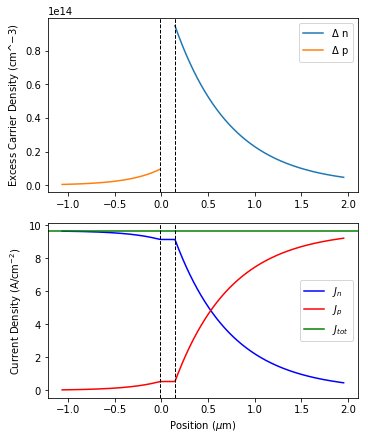

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec

## Try out different configurations!
NA = 1e16
ND = 1e17
## Also try different drain bias, you can try negative ones as well
VD = 0.6

fig = plt.figure(figsize=(5,6),constrained_layout=True)
gs  = gridspec.GridSpec(2,1,figure=fig)
AX = [fig.add_subplot(gs[i]) for i in range(2)]

Vbi = k*T * np.log(NA*ND/ni**2)
WD = (2*epSi*(Vbi-VD)/q*(1/NA+1/ND))**0.5
xn = WD * NA/(NA+ND)
xp = WD * ND/(NA+ND)
Ln = np.sqrt(D_n * tau_n)
Lp = np.sqrt(D_p * tau_p)
n_p0 = ni**2 / NA
p_n0 = ni**2 / ND

sample = 10000

x_qnn = np.linspace(-xn-3*Lp,-xn,int(sample/2)) ## n quasi-neutral region
x_qnp = np.linspace( xp, xp+3*Ln,int(sample/2)) ## p quasi-neutral region
Deltap_qnn = p_n0 * ( np.exp(VD/k/T) -1 ) * np.exp((x_qnn+xn)/Lp)
Deltan_qnp = n_p0 * ( np.exp(VD/k/T) -1 ) * np.exp(-(x_qnp-xp)/Ln)

x = np.linspace(-xn-3*Lp,xp+3*Ln,sample)
Jn  = np.empty(sample)
Jp  = np.empty(sample)
idx_qnp = x >= xp
idx_qnn = x <= -xn
idx_dep = np.all([ -xn <=x,x<=xp],axis=0)
J_tot = q * (D_n * n_p0 / Ln + D_p * p_n0 / Lp )* ( np.exp(VD/k/T) -1 )
Jp[idx_qnn] = q * D_p * p_n0 / Lp * ( np.exp(VD/k/T) -1 ) * np.exp((x[idx_qnn]+xn)/Lp)
Jn[idx_qnn] = J_tot - Jp[idx_qnn]
Jn[idx_dep] = q * D_n * n_p0 / Ln * ( np.exp(VD/k/T) -1 ) 
Jp[idx_dep] = q * D_p * p_n0 / Lp * ( np.exp(VD/k/T) -1 ) 
Jn[idx_qnp] = q * D_n * n_p0 / Ln * ( np.exp(VD/k/T) -1 ) * np.exp(-(x[idx_qnp]-xp)/Ln)
Jp[idx_qnp] = J_tot - Jn[idx_qnp]

AX[0].plot(x_qnp * 1e4,Deltan_qnp,label="$\Delta$ n")
AX[0].plot(x_qnn * 1e4 ,Deltap_qnn,label="$\Delta$ p")
AX[0].set_ylabel("Excess Carrier Density (cm^$-3$)")
AX[1].plot(x * 1e4,Jn,label="$J_n$",c="b")
AX[1].plot(x * 1e4,Jp,label="$J_p$",c="r")
AX[1].axhline(y=J_tot,label="$J_{tot}$",c="g")
AX[1].set_ylabel("Current Density (A/cm$^{-2}$)")
AX[1].set_xlabel("Position ($\mu$m)")


for ax in AX:
    ax.legend()
    ax.axvline(x= -1e4*xn,ls="--",c='k',lw=1)
    ax.axvline(x=  1e4*xp,ls="--",c='k',lw=1)
plt.show()

### Reverse Bias: Qualitative Picture
When a negative bias $V_D$ is applied on the p side, the electrostatic potential of the p-type region goes down, and the quasi-Fermi level goes up. Therefore, the energy barrier height seen by majoraty carriers increases. The band diagram change from the left (equilibrium) to the right subfigure below.

<img src="img/PN_reverse_BD.png" width="600">

Unlike the forward bias condition, carrier injection from the majority side to minority side is not possible becasue the energy barrier height is even higher than equilibrium.
Instead, carriers drift from the minority side to the majority through the depletion region.
This mechanism results in little current, because the number of minority carriers that flows into the depletion region is limited.

<img src="img/PN_reverse_Carriers.png" width="600">

### Reverse Bias: Current Formulation

Solving for minority carrier profile is an effective way to discuss the problem.
The formulations we derived in forward bias also apply to reverse bias condition.
However, there are distinct differences in the excess carriers and current profiles. To name a few:
- The minority carrier density at the depletion region edge becomes nearly zero.
- "Excess" minority carrier densities are negative in quasi-neutral regions. When $V_D << -kT/q$, $\Delta n (x_p) \approx -n_{p0}$ and $\Delta p (-x_n) \approx -p_{n0}$. 
- The current saturates at $J_{tot} = J_s$ as the negative bias increases, where 
\begin{equation}
J_s = q n_i^2 \left( \frac{D_n }{N_A L_n} + \frac{D_p }{N_D L_p} \right)
\end{equation}

This a constant current regardless of the value of negative $V_D$, and it is many orders smaller than what can be achieved in forward bias. Therefore, the device exhibits __rectifying__ behaviour: large current can flow in forward bias, but little current can flow in reverse bias.


## Discussion

The ideal current model gives
\begin{align}
J_{tot} &= -q n_i^2 \left( \frac{D_n }{N_A L_n} + \frac{D_p }{N_D L_p} \right) \left( e^{qV_D/kT} -1 \right)
\end{align}
which clearly indicates how __minority carrier transport__ determines the total current. The more the minority carrier density, the larger the current can be. 

### Doping Dependence

- Generally, the heavier the doping, the less the minority carriers, and therefore the smaller the current.
- For a one-sided junction, i.e. a junction where one side is much more heavily-doped, the minority carrier in the lighter doped side dominates the total current. For example, 
    - For a forward biased n$^+$-p junction, the electrons injected from n$^+$ side to p side is much more than the holes injected from the p side to n side.
    - For a reverse biased n$^+$-p junction, the electrons drifted from p side to n$^+$ side is much more than the holes drifted from the n$^+$ side to p side.
    
You might have observed these effects from the code block above.

### Temperature Dependence
Rewrite $J_{tot}$ into a form with explicit temperature dependence
\begin{align}
J_{tot} &= -q N_C N_V e^{-E_g/kT} \left( \frac{1}{N_A} \sqrt{\frac{D_n}{\tau_n}} + \frac{1}{N_D} \sqrt{\frac{D_p}{\tau_p}} \right) \left( e^{qV_D/kT} -1 \right)
\end{align}
We see that the increase of temperature results in increase of intrinsic carrier density and therefore minority carrier density, which dominates the increase of total current. Besides, the diffusion coefficients are nearly proportional to the temperature because the temperature dependence of mobility is weaker than the linear tempereature dependence of the thermal voltage in Eistein relation ($D_n = \frac{kT}{q} \mu_n$ ). Therefore, for the same voltage bias the current always increases if temperature increases.